# Transformer Results

## Imports

In [2]:
# Add Utils to path
import sys
sys.path.append('../Utils')  # Adds higher directory to python modules path.

# Utils
from datasets_generators import CocoDetection
from plot_coco_image import plot_coco_image

# Pytorch
import torch
from transformers import DetrForObjectDetection
from transformers import DetrImageProcessor

# Other
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## Common

In [3]:
def plot_image_vs_prediction(image_id, test_path, model_path, width):

    # CONSTANTS
    imgs_path = "../ExDark_All/Images"
    image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'lime', 'teal', 'lavender']

    # Dataset Load
    test_set = CocoDetection(image_directory_path=imgs_path,  annotation_file_path=test_path, image_processor=image_processor)

    # Labels
    id2label = {k: v["name"] for k, v in test_set.coco.cats.items()}

    # Model
    model = DetrForObjectDetection.from_pretrained(model_path)

    # Load Image
    image_ids = test_set.coco.getImgIds()
    image = test_set.coco.loadImgs(image_id)[0]
    img_path = os.path.join(imgs_path, image['file_name'])
    image = cv2.imread(img_path)

    # Start Figure
    plt.figure(figsize=(15, 7.5))
    plt.subplot(1, 2, 1)

    # Ground Truth
    plot_coco_image(coco_dataset=test_set, imgs_path = "../ExDark_All/Images", image_id=image_id, width=width)

    # More Figure Stuff
    plt.title("Ground Truth")
    plt.axis('off')
    plt.subplot(1, 2, 2)

    # Predict
    with torch.no_grad():

        # load image and predict
        inputs = image_processor(images=image, return_tensors='pt')
        outputs = model(**inputs)

        # post-process
        target_sizes = torch.tensor([image.shape[:2]])
        results = image_processor.post_process_object_detection(
            outputs=outputs, 
            threshold=0.001, 
            target_sizes=target_sizes
        )[0]

        image = Image.open(img_path)
        draw = ImageDraw.Draw(image)

        print("\nPredicted Annotations: ")

        # Keep best predictions
        for i in range(len(results["scores"])):

            if results["scores"][i] > 0.15:
                score = round(float(results["scores"][i]), 5)
                label = int(results['labels'][i])
                box = results["boxes"][i]

                print("Score: ", score, "Label: ", id2label[label], "Box: ", box)

                bbox = np.array([int(b) for b in box])
                draw.rectangle([bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]], width=width, outline=colors[label])
                draw.text([bbox[0], bbox[1]], id2label[label], fill=colors[label])

    plt.imshow(image)
    plt.title("Prediction")
    plt.axis('off')
    plt.show()       

## Model 1 -  100/20/20

### Image Comparison

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


loading annotations into memory...
Done (t=0.24s)
creating index...
index created!

Image ID:  0 Image:  2015_02151.jpg

Ground Truth Annotations: 
{'id': 0, 'image_id': 0, 'category_id': 3, 'bbox': ['27', '305', '1105', '339'], 'area': 374595.0} Category Label:  Bus

Predicted Annotations: 


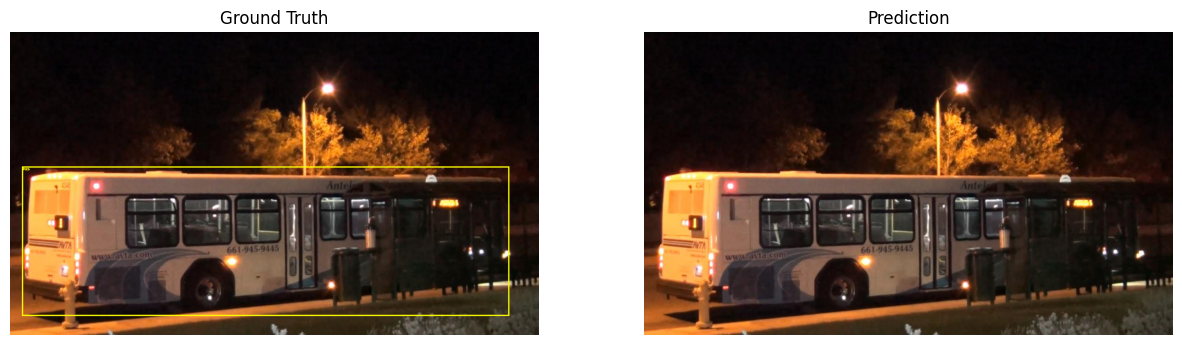

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!

Image ID:  1 Image:  2015_01691.JPEG

Ground Truth Annotations: 
{'id': 1, 'image_id': 1, 'category_id': 2, 'bbox': ['87', '123', '46', '132'], 'area': 6072.0} Category Label:  Bottle
{'id': 2, 'image_id': 1, 'category_id': 7, 'bbox': ['140', '214', '53', '33'], 'area': 1749.0} Category Label:  Cup
{'id': 3, 'image_id': 1, 'category_id': 7, 'bbox': ['137', '192', '27', '27'], 'area': 729.0} Category Label:  Cup
{'id': 4, 'image_id': 1, 'category_id': 11, 'bbox': ['1', '226', '499', '147'], 'area': 73353.0} Category Label:  Table

Predicted Annotations: 
Score:  0.24781 Label:  Bottle Box:  tensor([ 75.5721, 115.4646, 128.3495, 251.7693])
Score:  0.17606 Label:  Bottle Box:  tensor([ 79.0457, 116.3460, 130.2364, 251.6428])


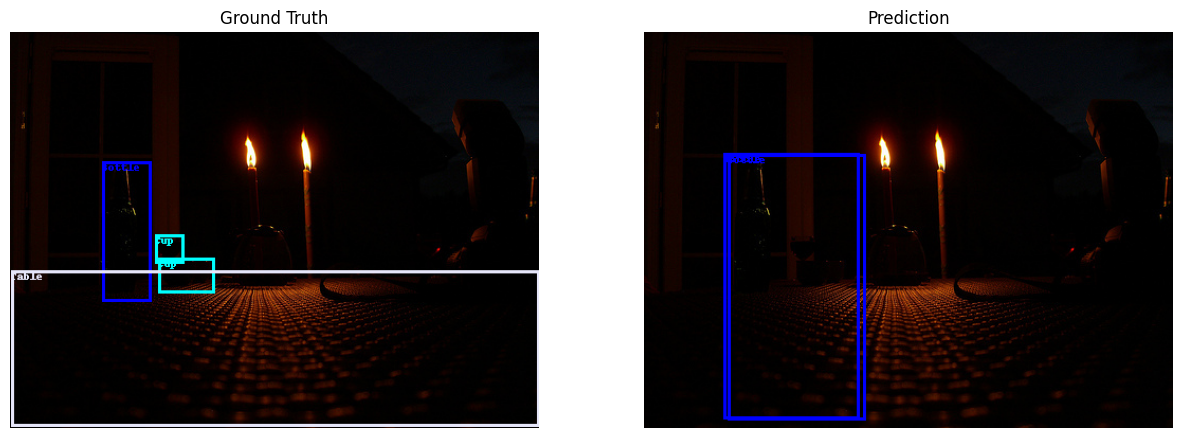

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!

Image ID:  2 Image:  2015_03785.png

Ground Truth Annotations: 
{'id': 5, 'image_id': 2, 'category_id': 6, 'bbox': ['5', '344', '98', '132'], 'area': 12936.0} Category Label:  Chair
{'id': 6, 'image_id': 2, 'category_id': 11, 'bbox': ['37', '350', '75', '91'], 'area': 6825.0} Category Label:  Table
{'id': 7, 'image_id': 2, 'category_id': 0, 'bbox': ['279', '323', '88', '88'], 'area': 7744.0} Category Label:  Bicycle

Predicted Annotations: 
Score:  0.76763 Label:  Chair Box:  tensor([  3.3435, 344.6593,  94.8849, 463.9263])
Score:  0.34239 Label:  Table Box:  tensor([ 22.9222, 347.3320, 113.9094, 439.4556])
Score:  0.2774 Label:  Chair Box:  tensor([  2.6443, 344.7817,  62.3695, 459.2981])
Score:  0.18243 Label:  Chair Box:  tensor([287.8884, 324.9328, 358.1037, 407.6690])
Score:  0.47948 Label:  Table Box:  tensor([ 24.4381, 350.2698, 113.7444, 436.2703])
Score:  0.31655 Label:  Table Box:  tensor([ 28

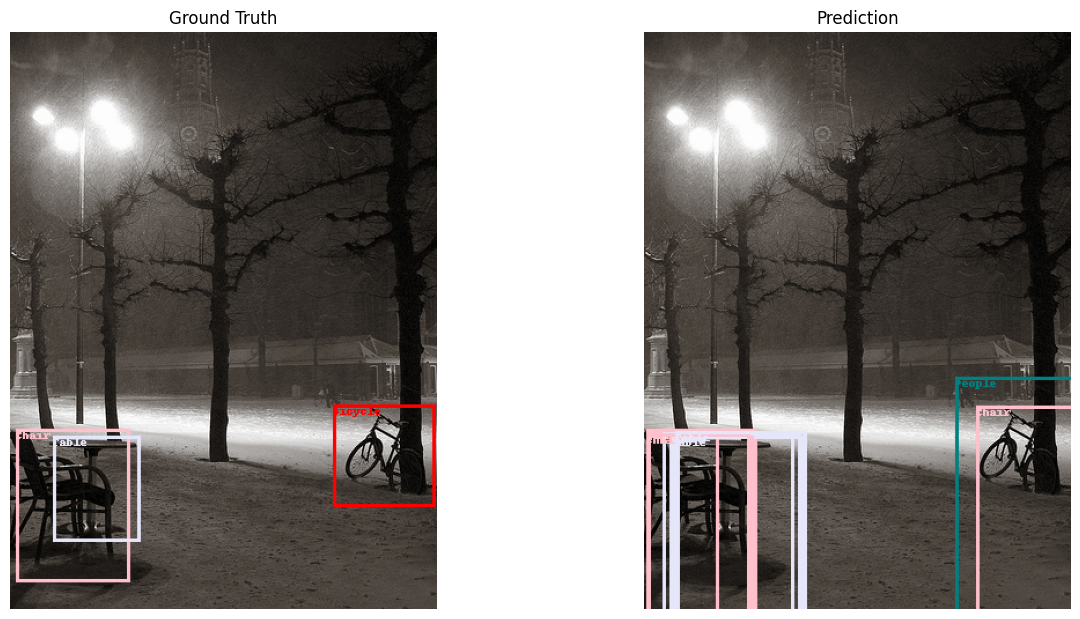

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!

Image ID:  3 Image:  2015_00446.jpg

Ground Truth Annotations: 
{'id': 8, 'image_id': 3, 'category_id': 0, 'bbox': ['303', '160', '71', '107'], 'area': 7597.0} Category Label:  Bicycle
{'id': 9, 'image_id': 3, 'category_id': 0, 'bbox': ['80', '190', '164', '237'], 'area': 38868.0} Category Label:  Bicycle
{'id': 10, 'image_id': 3, 'category_id': 0, 'bbox': ['240', '170', '51', '94'], 'area': 4794.0} Category Label:  Bicycle
{'id': 11, 'image_id': 3, 'category_id': 10, 'bbox': ['317', '114', '54', '135'], 'area': 7290.0} Category Label:  People
{'id': 12, 'image_id': 3, 'category_id': 10, 'bbox': ['255', '118', '50', '139'], 'area': 6950.0} Category Label:  People
{'id': 13, 'image_id': 3, 'category_id': 10, 'bbox': ['111', '71', '150', '304'], 'area': 45600.0} Category Label:  People

Predicted Annotations: 
Score:  0.50895 Label:  Bicycle Box:  tensor([ 95.3890, 190.6994, 233.1538, 421.6826])
Score:  0

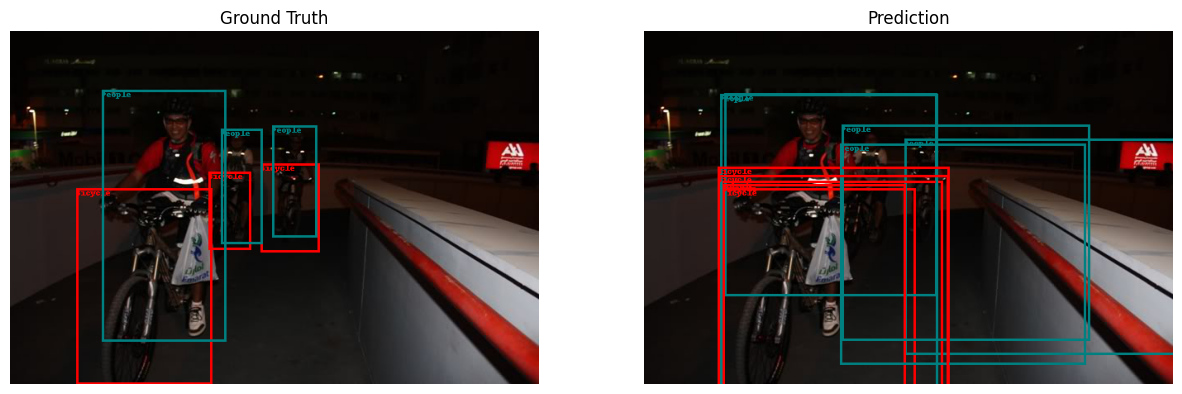

In [4]:
# Parameters
image_ids = [0, 1, 2, 3]
model_path = "../Models/Transformer/lightning_logs/100-20-rest/"
test_path = "../ExDark_COCO/100-20-rest/test_set.json"
width = 3

# Plot
for image_id in image_ids:
    plot_image_vs_prediction(image_id=image_id, test_path=test_path, model_path=model_path, width=width)

### Metrics

In [5]:
# Metrics
df = pd.read_csv('../Models/Transformer/lightning_logs/100-20-rest/metrics.csv', header=0)

# Training loss
df_train = df[['epoch', 'training_loss']]
df_train = df_train[df_train['training_loss'].notna()]

# Validation loss
df_val = df[['epoch', 'validation/loss']]
df_val = df_val[df_val['validation/loss'].notna()]

df

,validation_loss_bbox,step,validation/loss,epoch,validation_loss_giou,validation_cardinality_error,validation_loss_ce,train_loss_giou,train_loss_ce,train_cardinality_error,training_loss,train_loss_bbox
0,0.049326,3,2.938838,0,0.239500,48.75,2.213205,NaN,NaN,NaN,NaN,NaN
1,NaN,4,NaN,1,NaN,NaN,NaN,0.246522,2.031634,45.00,3.017916,0.098648
2,0.050025,7,2.511971,1,0.235850,4.45,1.790149,NaN,NaN,NaN,NaN,NaN
3,NaN,9,NaN,2,NaN,NaN,NaN,0.170790,1.260945,2.00,1.804241,0.040343
4,0.050098,11,2.271752,2,0.242184,4.85,1.536895,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.049636,191,1.404230,47,0.249103,1.25,0.657845,NaN,NaN,NaN,NaN,NaN
86,NaN,194,NaN,48,NaN,NaN,NaN,0.041249,0.249857,0.75,0.431089,0.019747
87,0.051135,195,1.327605,48,0.244367,1.20,0.583198,NaN,NaN,NaN,NaN,NaN
88,NaN,199,NaN,49,NaN,NaN,NaN,0.063589,0.189255,0.75,0.386752,0.014064


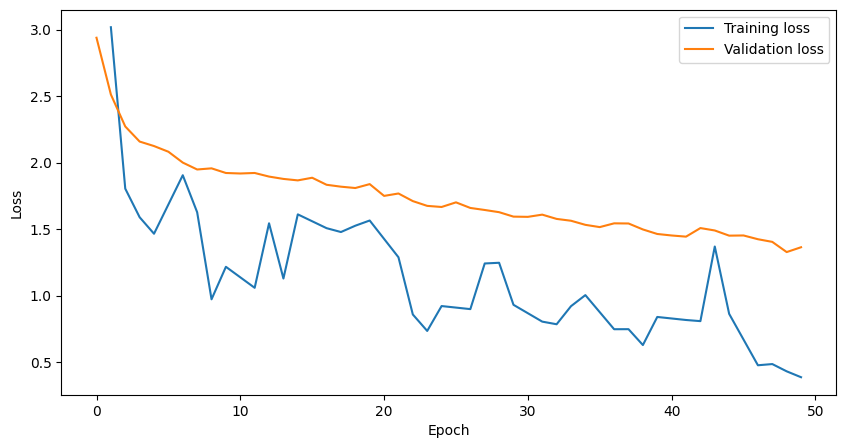

In [6]:
# Plot Loss Evolution
plt.figure(figsize=(10, 5))
plt.plot(df_train['epoch'], df_train['training_loss'], label='Training loss')
plt.plot(df_val['epoch'], df_val['validation/loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model 2 -  320/50/50

### Image Comparison

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!

Image ID:  10 Image:  2015_05238.jpg

Ground Truth Annotations: 
{'id': 49, 'image_id': 10, 'category_id': 8, 'bbox': ['318', '183', '166', '283'], 'area': 46978.0} Category Label:  Dog
{'id': 50, 'image_id': 10, 'category_id': 8, 'bbox': ['87', '44', '103', '175'], 'area': 18025.0} Category Label:  Dog

Predicted Annotations: 
Score:  0.40782 Label:  Dog Box:  tensor([ 85.8444,  40.9907, 180.7978, 218.5256])
Score:  0.91363 Label:  Dog Box:  tensor([314.5441, 186.7833, 476.1537, 464.8464])


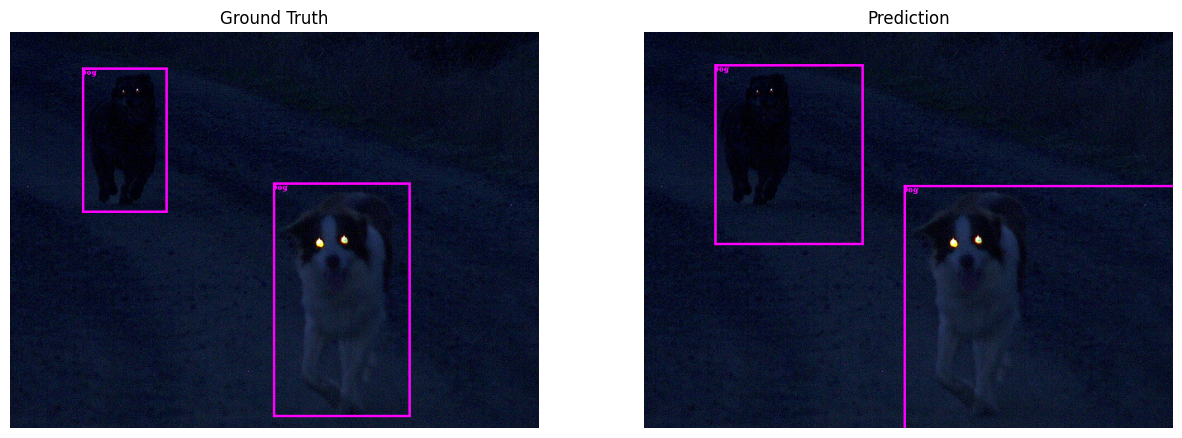

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!

Image ID:  20 Image:  2015_02423.jpg

Ground Truth Annotations: 
{'id': 110, 'image_id': 20, 'category_id': 4, 'bbox': ['26', '55', '447', '238'], 'area': 106386.0} Category Label:  Car

Predicted Annotations: 
Score:  0.81746 Label:  Car Box:  tensor([  4.1244,   8.2561, 147.5036, 117.7233])
Score:  0.92311 Label:  Car Box:  tensor([ 40.5509,  47.4949, 469.7035, 308.1905])
Score:  0.94732 Label:  Car Box:  tensor([344.8879, 174.8142, 497.6418, 327.4047])


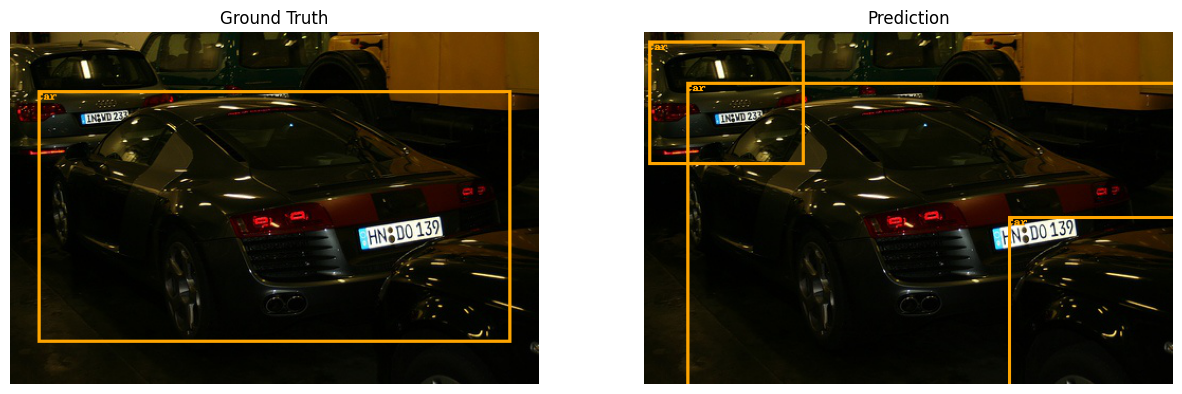

loading annotations into memory...
Done (t=0.26s)
creating index...
index created!

Image ID:  30 Image:  2015_02006.jpg

Ground Truth Annotations: 
{'id': 142, 'image_id': 30, 'category_id': 3, 'bbox': ['79', '176', '491', '143'], 'area': 70213.0} Category Label:  Bus

Predicted Annotations: 
Score:  0.63872 Label:  People Box:  tensor([232.5961, 232.5521, 257.5833, 291.9044])
Score:  0.85641 Label:  Bus Box:  tensor([ 71.2714, 183.2531, 562.2155, 321.3192])


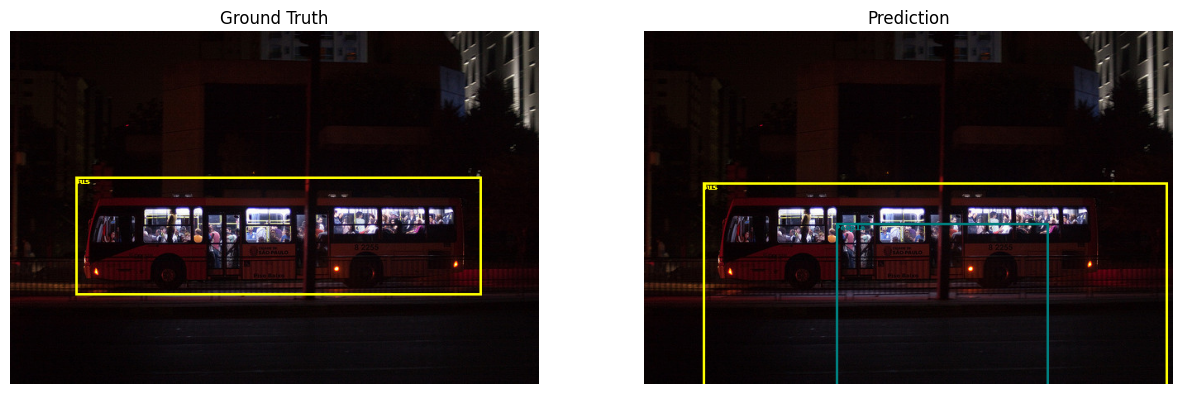

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!

Image ID:  40 Image:  2015_06955.jpg

Ground Truth Annotations: 
{'id': 190, 'image_id': 40, 'category_id': 11, 'bbox': ['39', '390', '750', '273'], 'area': 204750.0} Category Label:  Table

Predicted Annotations: 
Score:  0.94326 Label:  Table Box:  tensor([ 21.9711, 415.2906, 774.2720, 664.8074])


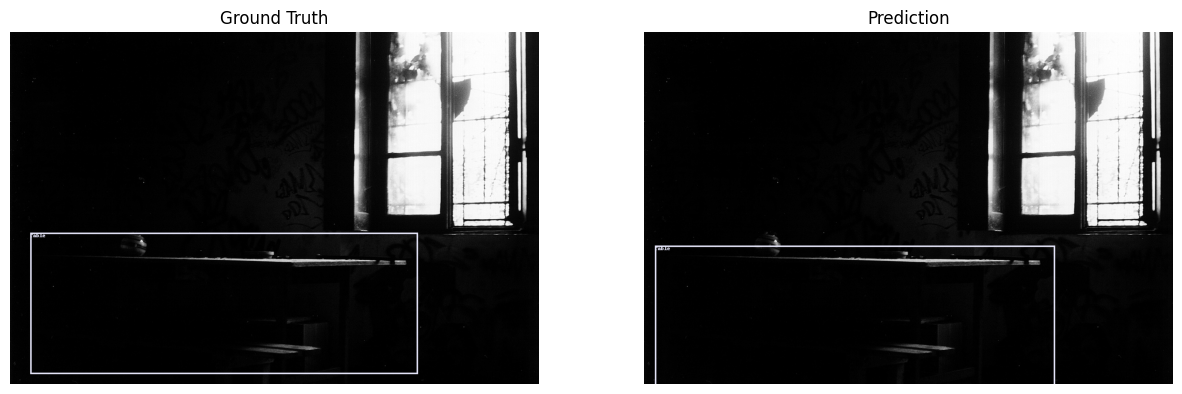

In [7]:
# Parameters
image_ids = [10, 20, 30, 40]
model_path = "../Models/Transformer/lightning_logs/320-50-rest/"
test_path = "../ExDark_COCO/320-50-rest/test_set.json"
width = 3

# Plot
for image_id in image_ids:
    plot_image_vs_prediction(image_id=image_id, test_path=test_path, model_path=model_path, width=width)

### Metrics

In [8]:
# Metrics
df = pd.read_csv('../Models/Transformer/lightning_logs/320-50-rest/metrics.csv', header=0)

# Training loss
df_train = df[['epoch', 'training_loss']]
df_train = df_train[df_train['training_loss'].notna()]

# Validation loss
df_val = df[['epoch', 'validation/loss']]
df_val = df_val[df_val['validation/loss'].notna()]

df

,epoch,training_loss,step,train_loss_giou,train_loss_ce,train_cardinality_error,train_loss_bbox,validation_loss_giou,validation_loss_ce,validation_cardinality_error,validation/loss,validation_loss_bbox
0,0,3.108514,4,0.210819,2.213842,65.50,0.094607,NaN,NaN,NaN,NaN,NaN
1,0,1.963553,9,0.139228,1.531272,2.75,0.030765,NaN,NaN,NaN,NaN,NaN
2,0,NaN,9,NaN,NaN,NaN,NaN,0.19239,1.407713,3.88,2.048644,0.051230
3,1,1.715313,14,0.234002,0.883325,2.00,0.072797,NaN,NaN,NaN,NaN,NaN
4,1,1.109066,19,0.132310,0.642832,1.25,0.040323,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,0.588997,489,0.181189,0.116986,3.75,0.021927,NaN,NaN,NaN,NaN,NaN
146,48,NaN,489,NaN,NaN,NaN,NaN,0.23451,0.433136,1.54,1.260062,0.071581
147,49,0.676021,494,0.193605,0.151781,1.00,0.027406,NaN,NaN,NaN,NaN,NaN
148,49,0.685514,499,0.176995,0.198343,2.50,0.026636,NaN,NaN,NaN,NaN,NaN


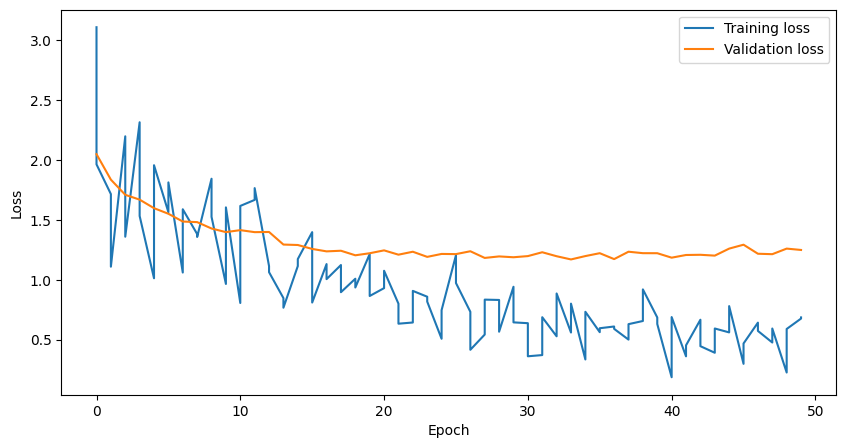

In [9]:
# Plot Loss Evolution
plt.figure(figsize=(10, 5))
plt.plot(df_train['epoch'], df_train['training_loss'], label='Training loss')
plt.plot(df_val['epoch'], df_val['validation/loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()